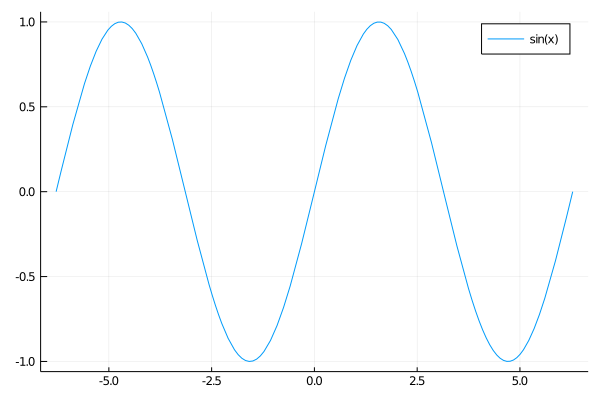

In [1]:
using Plots
gr(fmt=:png);
plot(sin, -2π, 2π, label="sin(x)")

<!-- $$ \exp(i \pi) = -1$$ -->

```Option + P```　で πと打てるけど...まさかJuliaが読み込んでくれるとは驚いた。

In [3]:
π

π = 3.1415926535897...

In [6]:
? repeat

search: repeat RecipeData RecipesBase



```
repeat(A::AbstractArray, counts::Integer...)
```

Construct an array by repeating array `A` a given number of times in each dimension, specified by `counts`.

# Examples

```jldoctest
julia> repeat([1, 2, 3], 2)
6-element Array{Int64,1}:
 1
 2
 3
 1
 2
 3

julia> repeat([1, 2, 3], 2, 3)
6×3 Array{Int64,2}:
 1  1  1
 2  2  2
 3  3  3
 1  1  1
 2  2  2
 3  3  3
```

---

```
repeat(A::AbstractArray; inner=ntuple(x->1, ndims(A)), outer=ntuple(x->1, ndims(A)))
```

Construct an array by repeating the entries of `A`. The i-th element of `inner` specifies the number of times that the individual entries of the i-th dimension of `A` should be repeated. The i-th element of `outer` specifies the number of times that a slice along the i-th dimension of `A` should be repeated. If `inner` or `outer` are omitted, no repetition is performed.

# Examples

```jldoctest
julia> repeat(1:2, inner=2)
4-element Array{Int64,1}:
 1
 1
 2
 2

julia> repeat(1:2, outer=2)
4-element Array{Int64,1}:
 1
 2
 1
 2

julia> repeat([1 2; 3 4], inner=(2, 1), outer=(1, 3))
4×6 Array{Int64,2}:
 1  2  1  2  1  2
 1  2  1  2  1  2
 3  4  3  4  3  4
 3  4  3  4  3  4
```

---

```
repeat(s::AbstractString, r::Integer)
```

Repeat a string `r` times. This can be written as `s^r`.

See also: [`^`](@ref)

# Examples

```jldoctest
julia> repeat("ha", 3)
"hahaha"
```

---

```
repeat(c::AbstractChar, r::Integer) -> String
```

Repeat a character `r` times. This can equivalently be accomplished by calling [`c^r`](@ref ^).

# Examples

```jldoctest
julia> repeat('A', 3)
"AAA"
```


# Chapter 3.0

- Variables
- Arrays or Vectors
- loops
- conditionals

In [12]:
#
# [1:10] *2
n = 100
e = randn(n);

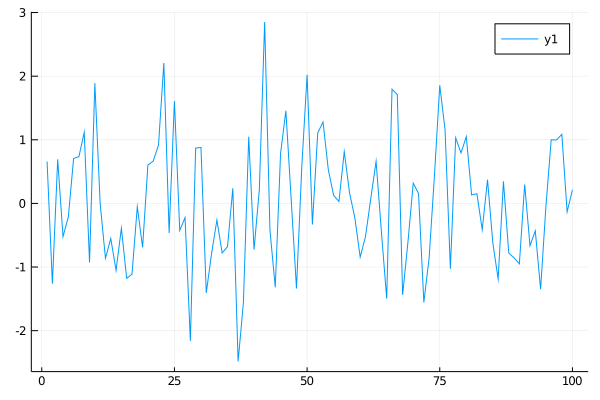

In [13]:
Plots.plot(1:n, e)

In [15]:
typeof(e)

Array{Float64,1}

In [19]:
# １から５番目までの要素を取ってくる（py と異なる。）
# like matlab and fortran, and unlike python and c
e[1:5]

5-element Array{Float64,1}:
  0.6591065664981594
 -1.2606482195970878
  0.6928436194615167
 -0.5218574953103704
 -0.21571177320383883

In [20]:
M = [1 2; 3.5 4]

2×2 Array{Float64,2}:
 1.0  2.0
 3.5  4.0

### 3.3.4 For Loop

In [23]:
n, e

(100, [0.6591065664981594, -1.2606482195970878, 0.6928436194615167, -0.5218574953103704, -0.21571177320383883, 0.7070945372526193, 0.7350501685986166, 1.117215474288135, -0.9275418952060264, 1.8905889470867814  …  0.29863829662342545, -0.664309347813428, -0.43133066650313956, -1.3501446385563884, -0.049539913260166275, 1.0002351890771117, 0.9972712187370151, 1.08563143909195, -0.13233653769558273, 0.21255748844292396])

In [26]:
for i in 1:n
    e[i] = randn()
    # println(e[i])
end

In [28]:
# "≠" can be typed by \ne<tab>
? ≠

"≠" can be typed by \ne<tab>

search: ≠



```
!=(x, y)
≠(x,y)
```

Not-equals comparison operator. Always gives the opposite answer as [`==`](@ref).

# Implementation

New types should generally not implement this, and rely on the fallback definition `!=(x,y) = !(x==y)` instead.

# Examples

```jldoctest
julia> 3 != 2
true

julia> "foo" ≠ "foo"
false
```

---

```
!=(x)
```

Create a function that compares its argument to `x` using [`!=`](@ref), i.e. a function equivalent to `y -> y != x`. The returned function is of type `Base.Fix2{typeof(!=)}`, which can be used to implement specialized methods.

!!! compat "Julia 1.2"
    This functionality requires at least Julia 1.2.



In [30]:
α =1

1

In [6]:
ϵ = randn(100);

In [10]:
eachindex(ϵ)

Base.OneTo(100)

In [16]:
@time ϵ = randn(100);

  0.000006 seconds (1 allocation: 896 bytes)


In [18]:
# {1:"a"}

In [19]:
slice = 1:10

1:10

In [20]:
ϵ[slice]

10-element Array{Float64,1}:
 -0.6067014254074398
 -1.8546294384307542
 -1.4706870069762077
  2.202471905635554
  0.030050443190662787
  1.6716342100036643
 -1.0685210650633106
  0.2663990188677753
  1.0402895029570387
 -0.619324824845313

In [22]:
# ϵ .^2
st = 10
ed = st+5
ϵ[st:ed]

6-element Array{Float64,1}:
 -0.619324824845313
  0.1281800437261011
  0.4752077714151974
  0.3600020333276373
  1.0723295672429936
  1.1729455090009622

In [26]:
# UDF
function generatedata(n)
    ϵ = randn(n) # use built in function
    return ϵ .^2
end

data = generatedata(5)

5-element Array{Float64,1}:
 0.16601145901736453
 0.02113971052049879
 3.191588073746635
 0.23542565795745918
 0.06446195848694808

## We can even drop the function if we define it on a single line.

In [28]:
generatedata(n) = randn(n) .^3
# ちなみにpositional argmentはダメらしい。
generatedata(n=4)

MethodError: MethodError: no method matching generatedata(; n=4)
Closest candidates are:
  generatedata(!Matched::Any) at In[28]:1 got unsupported keyword argument "n"

In [29]:
generatedata(4)

4-element Array{Float64,1}:
 -2.969322607699485
 -0.7014215612730109
 -0.028883962446790097
  1.9750119295235082

In [30]:
f(x) = x^2 # simple square function
generatedata(n) = f.(randn(n)) # uses broadcast for some function `f`
data = generatedata(5)

5-element Array{Float64,1}:
 0.06918095320377858
 0.18642177943229143
 0.00728350464838325
 1.5387066561145326
 0.3657690695037602

In [37]:
f.(1:4)

4-element Array{Int64,1}:
  1
  4
  9
 16

Function そのものを　ブロードキャスティングできる。

In [38]:
generatedata(n, gen) = gen.(randn(n))

generatedata (generic function with 2 methods)

In [43]:
# ? generatedata
f(x) =  x^ 2

f (generic function with 1 method)

In [44]:

generatedata(5, f)

5-element Array{Float64,1}:
 0.14932717634615517
 0.4501081871669444
 0.719662393851354
 1.6504924979623837e-6
 0.4439079594427391

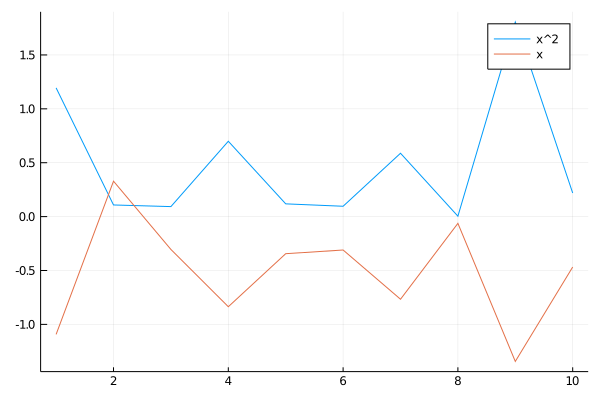

In [48]:
n = 10
x = randn(n)
plot(f.(x), label="x^2")
plot!(x, label="x") # layer on the same plot

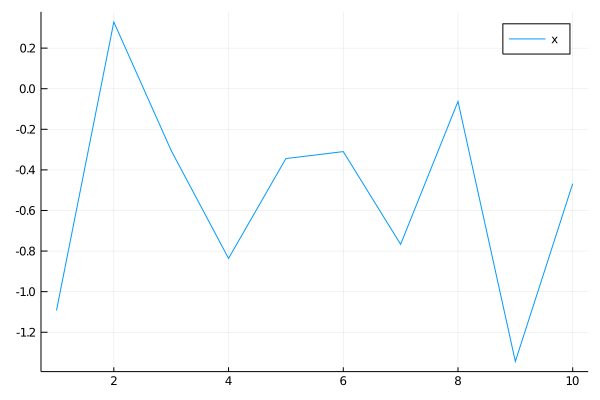

In [49]:
plot(f.(x), label="x^2")
plot(x, label="x")

```!```一つで変わってしまうのか？！

[8/5] 演算子の使い方がまだ不明瞭

    While broadcasting above superficially looks like vectorizing functions in MATLAB, or
    Python ufuncs, it is much richer and built on core foundations of the language.
    The other additional function plot! adds a graph to the existing plot.
    This follows a general convention in Julia, where a function that modifies the arguments or a
    global state has a ! at the end of its name.


In [53]:
using Pkg
Pkg.add("Distributions")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
  Installed Distributions ─ v0.23.8
Updating `~/.julia/environments/v1.5/Project.toml`
  [31c24e10] + Distributions v0.23.8
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [31c24e10] ↑ Distributions v0.23.7 ⇒ v0.23.8


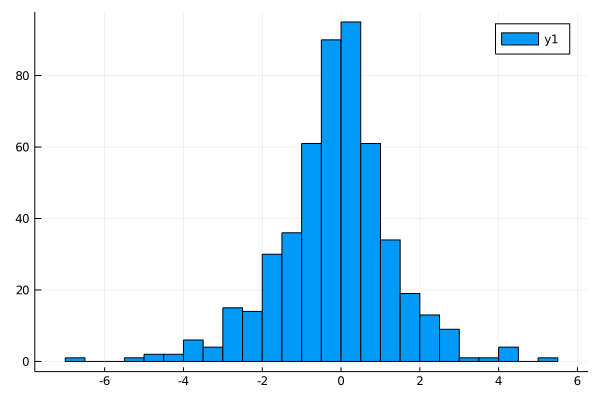

In [5]:
using Distributions
function plothistogram(distribution, n)
ϵ = rand(distribution, n) # n draws from distribution
histogram(ϵ)
end
lp = Laplace()
plothistogram(lp, 500)

> Julia use "multiple dispatch"

In [7]:
n = 10
rand(10), rand(Laplace(), n)

([0.3323427238142238, 0.8508928910470597, 0.4836895477265042, 0.751805042771742, 0.2808851540548962, 0.13660775654548885, 0.40587758369731564, 0.4246580192038336, 0.20191762379760658, 0.7568514629167475], [-0.5710346724644252, -0.20335745528689167, 0.9271974939375371, -0.1343595223853637, 0.36643303337627475, -0.9553408090036255, 0.3924469710665897, -1.162664116030611, -0.405683551747948, -0.9417259248144095])

3.4 ex: Variations on Fixed Points

In [19]:
# ν = p + βν
# Wiith β < 1 then ν will be converging.

# Can we broadcast when using the function?

function fixedpointmap(f; iv, tolerance=1E-7, maxiter=1000)
    # setup the algorithm
    # iv: initial value.
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

fixedpointmap (generic function with 1 method)

In [20]:
p =1.0
β = 0.9
f(v) = p + β* v

f (generic function with 1 method)

In [30]:

sol = fixedpointmap(f, iv=0.8, tolerance=1.0E-8) # don't need to pass
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 9.999999918629035, and |f(x) - x| = 9.041219328764782e-9 in 177 iterations


- In this example, all function parameters after the ; in the list, must be called by name
- default values can be enabled.

In [10]:
# r = 4
# r^2 * π 

In [25]:
using LinearAlgebra
norm

norm (generic function with 15 methods)